In [1]:
import pandas as pd
import numpy as np

import seaborn as sns
from matplotlib import pyplot as plt
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

from xgboost import XGBClassifier
from sklearn import tree

from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder

from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split as tts
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score, accuracy_score, confusion_matrix, classification_report, precision_score, recall_score, f1_score

sns.set_theme()

In [2]:
df = pd.read_csv("creditcardmarketing-bbm.csv")
df

,Customer Number,Offer Accepted,Reward,Mailer Type,Income Level,# Bank Accounts Open,Overdraft Protection,Credit Rating,# Credit Cards Held,# Homes Owned,Household Size,Own Your Home,Average Balance,Q1 Balance,Q2 Balance,Q3 Balance,Q4 Balance
0,1,No,Air Miles,Letter,High,1,No,High,2,1,4,No,1160.75,1669.0,877.0,1095.0,1002.0
1,2,No,Air Miles,Letter,Medium,1,No,Medium,2,2,5,Yes,147.25,39.0,106.0,78.0,366.0
2,3,No,Air Miles,Postcard,High,2,No,Medium,2,1,2,Yes,276.50,367.0,352.0,145.0,242.0
3,4,No,Air Miles,Letter,Medium,2,No,High,1,1,4,No,1219.00,1578.0,1760.0,1119.0,419.0
4,5,No,Air Miles,Letter,Medium,1,No,Medium,2,1,6,Yes,1211.00,2140.0,1357.0,982.0,365.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17995,17996,No,Cash Back,Letter,High,1,No,Low,1,1,5,Yes,167.50,136.0,65.0,71.0,398.0
17996,17997,No,Cash Back,Letter,High,1,No,Low,3,1,3,Yes,850.50,984.0,940.0,943.0,535.0
17997,17998,No,Cash Back,Letter,High,1,No,Low,2,1,4,No,1087.25,918.0,767.0,1170.0,1494.0
17998,17999,No,Cash Back,Letter,Medium,1,No,Medium,4,2,2,Yes,1022.25,626.0,983.0,865.0,1615.0


## Cleaning Dataset

melihat info dataset

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18000 entries, 0 to 17999
Data columns (total 17 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Customer Number       18000 non-null  int64  
 1   Offer Accepted        18000 non-null  object 
 2   Reward                18000 non-null  object 
 3   Mailer Type           18000 non-null  object 
 4   Income Level          18000 non-null  object 
 5   # Bank Accounts Open  18000 non-null  int64  
 6   Overdraft Protection  18000 non-null  object 
 7   Credit Rating         18000 non-null  object 
 8   # Credit Cards Held   18000 non-null  int64  
 9   # Homes Owned         18000 non-null  int64  
 10  Household Size        18000 non-null  int64  
 11  Own Your Home         18000 non-null  object 
 12  Average Balance       17976 non-null  float64
 13  Q1 Balance            17976 non-null  float64
 14  Q2 Balance            17976 non-null  float64
 15  Q3 Balance         

deskripsi dataset

In [4]:
df.describe()

,Customer Number,# Bank Accounts Open,# Credit Cards Held,# Homes Owned,Household Size,Average Balance,Q1 Balance,Q2 Balance,Q3 Balance,Q4 Balance
count,18000.000000,18000.000000,18000.000000,18000.000000,18000.000000,17976.000000,17976.000000,17976.000000,17976.000000,17976.000000
mean,9000.500000,1.255778,1.903500,1.203444,3.499056,940.515562,910.450656,999.392190,1042.033600,810.185803
std,5196.296758,0.472501,0.797009,0.427341,1.114182,350.297837,620.077060,457.402268,553.452599,559.001365
min,1.000000,1.000000,1.000000,1.000000,1.000000,48.250000,0.000000,0.000000,0.000000,0.000000
25%,4500.750000,1.000000,1.000000,1.000000,3.000000,787.500000,392.750000,663.000000,633.000000,363.000000
50%,9000.500000,1.000000,2.000000,1.000000,3.000000,1007.000000,772.000000,1032.000000,945.500000,703.000000
75%,13500.250000,1.000000,2.000000,1.000000,4.000000,1153.250000,1521.000000,1342.000000,1463.000000,1212.000000
max,18000.000000,3.000000,4.000000,3.000000,9.000000,3366.250000,3450.000000,3421.000000,3823.000000,4215.000000


melihat missing value

In [5]:
df.duplicated().sum()

0

In [6]:
df.isna().sum()

Customer Number          0
Offer Accepted           0
Reward                   0
Mailer Type              0
Income Level             0
# Bank Accounts Open     0
Overdraft Protection     0
Credit Rating            0
# Credit Cards Held      0
# Homes Owned            0
Household Size           0
Own Your Home            0
Average Balance         24
Q1 Balance              24
Q2 Balance              24
Q3 Balance              24
Q4 Balance              24
dtype: int64

mengisi nilai dengan median

In [7]:
df['Average Balance'].fillna(df['Average Balance'].median(), inplace = True)
df.isnull().sum()

Customer Number          0
Offer Accepted           0
Reward                   0
Mailer Type              0
Income Level             0
# Bank Accounts Open     0
Overdraft Protection     0
Credit Rating            0
# Credit Cards Held      0
# Homes Owned            0
Household Size           0
Own Your Home            0
Average Balance          0
Q1 Balance              24
Q2 Balance              24
Q3 Balance              24
Q4 Balance              24
dtype: int64

In [8]:
df['Q1 Balance'].fillna(df['Average Balance'].median(), inplace = True)
df.isnull().sum()

Customer Number          0
Offer Accepted           0
Reward                   0
Mailer Type              0
Income Level             0
# Bank Accounts Open     0
Overdraft Protection     0
Credit Rating            0
# Credit Cards Held      0
# Homes Owned            0
Household Size           0
Own Your Home            0
Average Balance          0
Q1 Balance               0
Q2 Balance              24
Q3 Balance              24
Q4 Balance              24
dtype: int64

In [9]:
df['Q2 Balance'].fillna(df['Average Balance'].median(), inplace = True)
df.isnull().sum()

Customer Number          0
Offer Accepted           0
Reward                   0
Mailer Type              0
Income Level             0
# Bank Accounts Open     0
Overdraft Protection     0
Credit Rating            0
# Credit Cards Held      0
# Homes Owned            0
Household Size           0
Own Your Home            0
Average Balance          0
Q1 Balance               0
Q2 Balance               0
Q3 Balance              24
Q4 Balance              24
dtype: int64

In [10]:
df['Q3 Balance'].fillna(df['Average Balance'].median(), inplace = True)
df.isnull().sum()

Customer Number          0
Offer Accepted           0
Reward                   0
Mailer Type              0
Income Level             0
# Bank Accounts Open     0
Overdraft Protection     0
Credit Rating            0
# Credit Cards Held      0
# Homes Owned            0
Household Size           0
Own Your Home            0
Average Balance          0
Q1 Balance               0
Q2 Balance               0
Q3 Balance               0
Q4 Balance              24
dtype: int64

In [11]:
df['Q4 Balance'].fillna(df['Average Balance'].median(), inplace = True)
df.isnull().sum()

Customer Number         0
Offer Accepted          0
Reward                  0
Mailer Type             0
Income Level            0
# Bank Accounts Open    0
Overdraft Protection    0
Credit Rating           0
# Credit Cards Held     0
# Homes Owned           0
Household Size          0
Own Your Home           0
Average Balance         0
Q1 Balance              0
Q2 Balance              0
Q3 Balance              0
Q4 Balance              0
dtype: int64

membuang kolom yang tidak diperlukan

In [12]:
df.drop(['Reward', 'Mailer Type', 'Overdraft Protection'], axis = 1, inplace = True)

In [13]:
df

,Customer Number,Offer Accepted,Income Level,# Bank Accounts Open,Credit Rating,# Credit Cards Held,# Homes Owned,Household Size,Own Your Home,Average Balance,Q1 Balance,Q2 Balance,Q3 Balance,Q4 Balance
0,1,No,High,1,High,2,1,4,No,1160.75,1669.0,877.0,1095.0,1002.0
1,2,No,Medium,1,Medium,2,2,5,Yes,147.25,39.0,106.0,78.0,366.0
2,3,No,High,2,Medium,2,1,2,Yes,276.50,367.0,352.0,145.0,242.0
3,4,No,Medium,2,High,1,1,4,No,1219.00,1578.0,1760.0,1119.0,419.0
4,5,No,Medium,1,Medium,2,1,6,Yes,1211.00,2140.0,1357.0,982.0,365.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17995,17996,No,High,1,Low,1,1,5,Yes,167.50,136.0,65.0,71.0,398.0
17996,17997,No,High,1,Low,3,1,3,Yes,850.50,984.0,940.0,943.0,535.0
17997,17998,No,High,1,Low,2,1,4,No,1087.25,918.0,767.0,1170.0,1494.0
17998,17999,No,Medium,1,Medium,4,2,2,Yes,1022.25,626.0,983.0,865.0,1615.0


mengganti nama kolom

In [14]:
df.rename(columns={'Income Level': 'IncomeLevel', 'Credit Rating': 'CreditRating', 'Own Your Home': 'OwnedHome'}, inplace=True)
df.rename(columns={'# Bank Accounts Open': 'BankAccOpen', '# Credit Cards Held': 'CreditCardHeld', '# Homes Owned': 'HomesOwned'}, inplace=True)


In [15]:
df.rename(columns={'Offer Accepted': 'OfferAccepted', 'Mailer Type': 'MailerType', 'Overdraft Protection': 'Overdratprotection'}, inplace=True)

In [16]:
df

,Customer Number,OfferAccepted,IncomeLevel,BankAccOpen,CreditRating,CreditCardHeld,HomesOwned,Household Size,OwnedHome,Average Balance,Q1 Balance,Q2 Balance,Q3 Balance,Q4 Balance
0,1,No,High,1,High,2,1,4,No,1160.75,1669.0,877.0,1095.0,1002.0
1,2,No,Medium,1,Medium,2,2,5,Yes,147.25,39.0,106.0,78.0,366.0
2,3,No,High,2,Medium,2,1,2,Yes,276.50,367.0,352.0,145.0,242.0
3,4,No,Medium,2,High,1,1,4,No,1219.00,1578.0,1760.0,1119.0,419.0
4,5,No,Medium,1,Medium,2,1,6,Yes,1211.00,2140.0,1357.0,982.0,365.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17995,17996,No,High,1,Low,1,1,5,Yes,167.50,136.0,65.0,71.0,398.0
17996,17997,No,High,1,Low,3,1,3,Yes,850.50,984.0,940.0,943.0,535.0
17997,17998,No,High,1,Low,2,1,4,No,1087.25,918.0,767.0,1170.0,1494.0
17998,17999,No,Medium,1,Medium,4,2,2,Yes,1022.25,626.0,983.0,865.0,1615.0


## EDA

menampilkan jumlah pendapatan berdasarkan level terkecil hingga terbesar

<AxesSubplot:xlabel='IncomeLevel', ylabel='Count'>

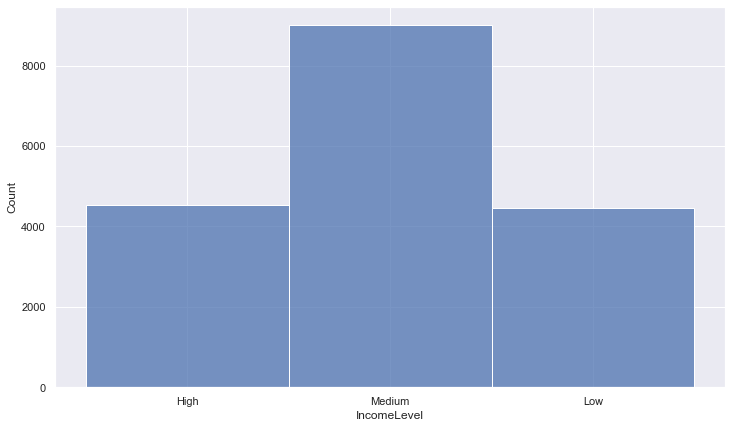

In [17]:
plt.figure(figsize=(12,7))
sns.histplot(df['IncomeLevel'])

menampilkan rating kredit dari terkecil hingga terbesar

<AxesSubplot:xlabel='CreditRating', ylabel='Count'>

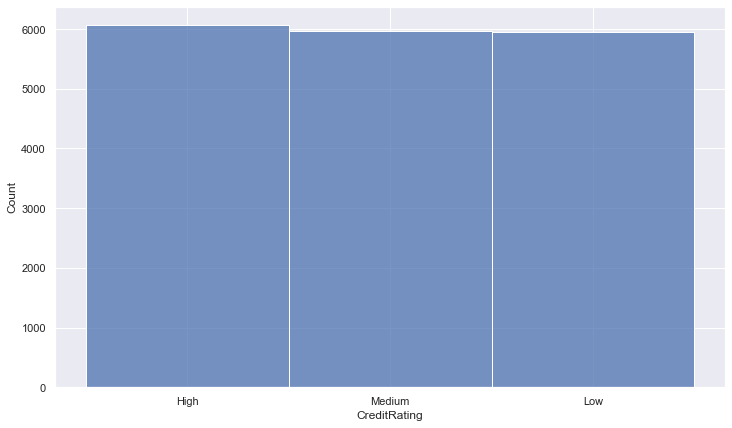

In [18]:
# Menampilkan score credit
plt.figure(figsize=(12,7))
sns.histplot(df['CreditRating'])

melihat nasabah yang memilki rumah

<AxesSubplot:xlabel='OwnedHome', ylabel='Count'>

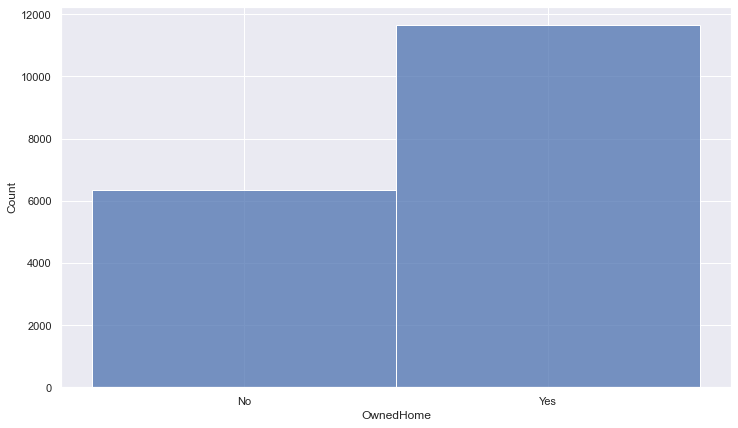

In [19]:
# Menampilkan nasabah yang memiliki rumah atau tidak
plt.figure(figsize=(12,7))
sns.histplot(df['OwnedHome'])

visualisasi menggunakan bar chart untuk menampilkan gabungan antara pendapatan dan score credit

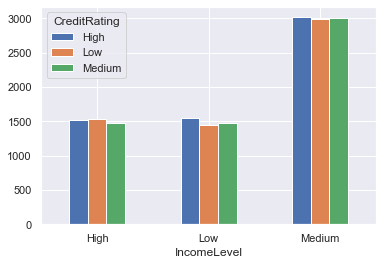

In [20]:

df.groupby(['IncomeLevel','CreditRating'])['Customer Number'].count().unstack().plot(kind='bar')
plt.xticks(rotation=0)
plt.show()

## Preprocessing


melihat perbandingan untuk nantinya yang akan digunakan sebagai modelling

In [21]:
come = df['OfferAccepted'].value_counts()
print(come)

No     16977
Yes     1023
Name: OfferAccepted, dtype: int64


In [22]:
df

,Customer Number,OfferAccepted,IncomeLevel,BankAccOpen,CreditRating,CreditCardHeld,HomesOwned,Household Size,OwnedHome,Average Balance,Q1 Balance,Q2 Balance,Q3 Balance,Q4 Balance
0,1,No,High,1,High,2,1,4,No,1160.75,1669.0,877.0,1095.0,1002.0
1,2,No,Medium,1,Medium,2,2,5,Yes,147.25,39.0,106.0,78.0,366.0
2,3,No,High,2,Medium,2,1,2,Yes,276.50,367.0,352.0,145.0,242.0
3,4,No,Medium,2,High,1,1,4,No,1219.00,1578.0,1760.0,1119.0,419.0
4,5,No,Medium,1,Medium,2,1,6,Yes,1211.00,2140.0,1357.0,982.0,365.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17995,17996,No,High,1,Low,1,1,5,Yes,167.50,136.0,65.0,71.0,398.0
17996,17997,No,High,1,Low,3,1,3,Yes,850.50,984.0,940.0,943.0,535.0
17997,17998,No,High,1,Low,2,1,4,No,1087.25,918.0,767.0,1170.0,1494.0
17998,17999,No,Medium,1,Medium,4,2,2,Yes,1022.25,626.0,983.0,865.0,1615.0


In [23]:
df_encode = df.copy()

## Encode Data

cek unique sebelum encoding

In [24]:
df_encode.OfferAccepted.unique()

array(['No', 'Yes'], dtype=object)

Encoding

In [25]:
ordinal_encoder = OrdinalEncoder( categories=[['Low','Medium','High']] )

#ubah dulu sebagai array
y = np.array(df_encode['IncomeLevel']).reshape(-1,1)
ordinal_encoder.fit(y)
df_encode['income_encode'] = ordinal_encoder.transform(y)
df_encode.head()

,Customer Number,OfferAccepted,IncomeLevel,BankAccOpen,CreditRating,CreditCardHeld,HomesOwned,Household Size,OwnedHome,Average Balance,Q1 Balance,Q2 Balance,Q3 Balance,Q4 Balance,income_encode
0,1,No,High,1,High,2,1,4,No,1160.75,1669.0,877.0,1095.0,1002.0,2.0
1,2,No,Medium,1,Medium,2,2,5,Yes,147.25,39.0,106.0,78.0,366.0,1.0
2,3,No,High,2,Medium,2,1,2,Yes,276.50,367.0,352.0,145.0,242.0,2.0
3,4,No,Medium,2,High,1,1,4,No,1219.00,1578.0,1760.0,1119.0,419.0,1.0
4,5,No,Medium,1,Medium,2,1,6,Yes,1211.00,2140.0,1357.0,982.0,365.0,1.0


In [26]:
ordinal_encoder = OrdinalEncoder( categories=[['Low','Medium','High']] )

#ubah dulu sebagai array
y1 = np.array(df_encode['CreditRating']).reshape(-1,1)
ordinal_encoder.fit(y1)
df_encode['creditrating_encode'] = ordinal_encoder.transform(y1)
df_encode.head()

,Customer Number,OfferAccepted,IncomeLevel,BankAccOpen,CreditRating,CreditCardHeld,HomesOwned,Household Size,OwnedHome,Average Balance,Q1 Balance,Q2 Balance,Q3 Balance,Q4 Balance,income_encode,creditrating_encode
0,1,No,High,1,High,2,1,4,No,1160.75,1669.0,877.0,1095.0,1002.0,2.0,2.0
1,2,No,Medium,1,Medium,2,2,5,Yes,147.25,39.0,106.0,78.0,366.0,1.0,1.0
2,3,No,High,2,Medium,2,1,2,Yes,276.50,367.0,352.0,145.0,242.0,2.0,1.0
3,4,No,Medium,2,High,1,1,4,No,1219.00,1578.0,1760.0,1119.0,419.0,1.0,2.0
4,5,No,Medium,1,Medium,2,1,6,Yes,1211.00,2140.0,1357.0,982.0,365.0,1.0,1.0


In [27]:
encoder = OneHotEncoder(sparse=False)
cat_cols = ['OwnedHome']

# Encode Categorical Data
df_encoded = pd.DataFrame(encoder.fit_transform(df_encode[cat_cols]))
df_encoded.columns = encoder.get_feature_names(cat_cols)

df_encode = df_encode.drop(cat_cols ,axis=1)
df_encode= pd.concat([df_encoded, df_encode], axis=1)

In [28]:
df_encode.drop(columns=['IncomeLevel','CreditRating'], inplace=True)
df_encode.head()

,OwnedHome_No,OwnedHome_Yes,Customer Number,OfferAccepted,BankAccOpen,CreditCardHeld,HomesOwned,Household Size,Average Balance,Q1 Balance,Q2 Balance,Q3 Balance,Q4 Balance,income_encode,creditrating_encode
0,1.0,0.0,1,No,1,2,1,4,1160.75,1669.0,877.0,1095.0,1002.0,2.0,2.0
1,0.0,1.0,2,No,1,2,2,5,147.25,39.0,106.0,78.0,366.0,1.0,1.0
2,0.0,1.0,3,No,2,2,1,2,276.50,367.0,352.0,145.0,242.0,2.0,1.0
3,1.0,0.0,4,No,2,1,1,4,1219.00,1578.0,1760.0,1119.0,419.0,1.0,2.0
4,0.0,1.0,5,No,1,2,1,6,1211.00,2140.0,1357.0,982.0,365.0,1.0,1.0


## Feature scaling atau Standardization

In [29]:
df_encode['OfferAccepted'] = df_encode['OfferAccepted'].apply(lambda x: 1 if x == 'Yes' else 0)

print('Shape of dataframe:', df_encode.shape)
df_encode.head()

Shape of dataframe: (18000, 15)


,OwnedHome_No,OwnedHome_Yes,Customer Number,OfferAccepted,BankAccOpen,CreditCardHeld,HomesOwned,Household Size,Average Balance,Q1 Balance,Q2 Balance,Q3 Balance,Q4 Balance,income_encode,creditrating_encode
0,1.0,0.0,1,0,1,2,1,4,1160.75,1669.0,877.0,1095.0,1002.0,2.0,2.0
1,0.0,1.0,2,0,1,2,2,5,147.25,39.0,106.0,78.0,366.0,1.0,1.0
2,0.0,1.0,3,0,2,2,1,2,276.50,367.0,352.0,145.0,242.0,2.0,1.0
3,1.0,0.0,4,0,2,1,1,4,1219.00,1578.0,1760.0,1119.0,419.0,1.0,2.0
4,0.0,1.0,5,0,1,2,1,6,1211.00,2140.0,1357.0,982.0,365.0,1.0,1.0


In [30]:
scaler = StandardScaler()
num_cols = ['BankAccOpen', 'CreditCardHeld', 'HomesOwned', 'Household Size', 'Average Balance', 'OwnedHome_No', 'OwnedHome_Yes']
df_encode[num_cols] = scaler.fit_transform(df_encode[num_cols])

df_encode.head()

,OwnedHome_No,OwnedHome_Yes,Customer Number,OfferAccepted,BankAccOpen,CreditCardHeld,HomesOwned,Household Size,Average Balance,Q1 Balance,Q2 Balance,Q3 Balance,Q4 Balance,income_encode,creditrating_encode
0,1.355315,-1.355315,1,0,-0.541343,0.121081,-0.476084,0.449620,0.628875,1669.0,877.0,1095.0,1002.0,2.0,2.0
1,-0.737836,0.737836,2,0,-0.541343,0.121081,1.864032,1.347164,-2.266319,39.0,106.0,78.0,366.0,1.0,1.0
2,-0.737836,0.737836,3,0,1.575115,0.121081,-0.476084,-1.345469,-1.897100,367.0,352.0,145.0,242.0,2.0,1.0
3,1.355315,-1.355315,4,0,1.575115,-1.133645,-0.476084,0.449620,0.795274,1578.0,1760.0,1119.0,419.0,1.0,2.0
4,-0.737836,0.737836,5,0,-0.541343,0.121081,-0.476084,2.244709,0.772421,2140.0,1357.0,982.0,365.0,1.0,1.0


In [31]:
df_encode.describe()

,OwnedHome_No,OwnedHome_Yes,Customer Number,OfferAccepted,BankAccOpen,CreditCardHeld,HomesOwned,Household Size,Average Balance,Q1 Balance,Q2 Balance,Q3 Balance,Q4 Balance,income_encode,creditrating_encode
count,1.800000e+04,1.800000e+04,18000.000000,18000.000000,1.800000e+04,1.800000e+04,1.800000e+04,1.800000e+04,1.800000e+04,18000.000000,18000.000000,18000.000000,18000.000000,18000.000000,18000.000000
mean,-2.013204e-17,1.227660e-16,9000.500000,0.056833,-1.892807e-16,-2.763222e-18,-2.103996e-16,-5.921189e-17,8.763360e-17,910.579389,999.402333,1041.986889,810.448222,1.003611,1.006333
std,1.000028e+00,1.000028e+00,5196.296758,0.231530,1.000028e+00,1.000028e+00,1.000028e+00,1.000028e+00,1.000028e+00,619.673531,457.097299,553.084965,558.674719,0.706606,0.817447
min,-7.378357e-01,-1.355315e+00,1.000000,0.000000,-5.413430e-01,-1.133645e+00,-4.760835e-01,-2.243013e+00,-2.549125e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,-7.378357e-01,-1.355315e+00,4500.750000,0.000000,-5.413430e-01,-1.133645e+00,-4.760835e-01,-4.479245e-01,-4.361122e-01,393.000000,664.000000,633.000000,363.750000,1.000000,0.000000
50%,-7.378357e-01,7.378357e-01,9000.500000,0.000000,-5.413430e-01,1.210811e-01,-4.760835e-01,-4.479245e-01,1.896682e-01,773.000000,1032.000000,946.000000,704.000000,1.000000,1.000000
75%,1.355315e+00,7.378357e-01,13500.250000,0.000000,-5.413430e-01,1.210811e-01,-4.760835e-01,4.496199e-01,6.054863e-01,1520.250000,1342.000000,1462.000000,1211.000000,2.000000,2.000000
max,1.355315e+00,7.378357e-01,18000.000000,1.000000,3.691574e+00,2.630533e+00,4.204148e+00,4.937342e+00,6.929171e+00,3450.000000,3421.000000,3823.000000,4215.000000,2.000000,2.000000


## Handling outlier

<AxesSubplot:xlabel='Average Balance'>

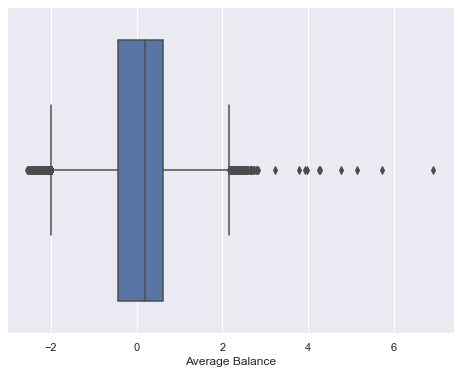

In [32]:
plt.figure(figsize=(8,6))
sns.boxplot(x=df_encode['Average Balance'])

In [33]:
q1 = df_encode['Average Balance'].quantile(.25)
q3 = df_encode['Average Balance'].quantile(.75)
iqr = q3-q1

df_encode['Average Balance'] = df_encode['Average Balance'].mask(((df_encode['Average Balance'] > (q3+(1.5*iqr)))), (q3+(1.5*iqr)))
df_encode.head()

,OwnedHome_No,OwnedHome_Yes,Customer Number,OfferAccepted,BankAccOpen,CreditCardHeld,HomesOwned,Household Size,Average Balance,Q1 Balance,Q2 Balance,Q3 Balance,Q4 Balance,income_encode,creditrating_encode
0,1.355315,-1.355315,1,0,-0.541343,0.121081,-0.476084,0.449620,0.628875,1669.0,877.0,1095.0,1002.0,2.0,2.0
1,-0.737836,0.737836,2,0,-0.541343,0.121081,1.864032,1.347164,-2.266319,39.0,106.0,78.0,366.0,1.0,1.0
2,-0.737836,0.737836,3,0,1.575115,0.121081,-0.476084,-1.345469,-1.897100,367.0,352.0,145.0,242.0,2.0,1.0
3,1.355315,-1.355315,4,0,1.575115,-1.133645,-0.476084,0.449620,0.795274,1578.0,1760.0,1119.0,419.0,1.0,2.0
4,-0.737836,0.737836,5,0,-0.541343,0.121081,-0.476084,2.244709,0.772421,2140.0,1357.0,982.0,365.0,1.0,1.0


<AxesSubplot:xlabel='Average Balance'>

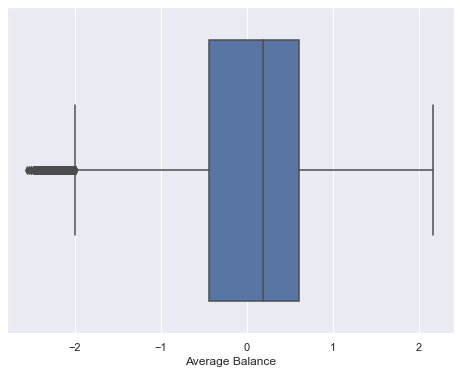

In [34]:
plt.figure(figsize=(8,6))
sns.boxplot(x=df_encode['Average Balance'])

## Split data


In [36]:
X = df_encode.drop(columns=['OfferAccepted'])
y = df_encode['OfferAccepted']

In [37]:
X_train, X_test, y_train, y_test = tts(X,y, test_size=0.2, random_state=123)

## Handling imbalance

Text(0.5, 1.0, 'Perbandingan penerima pengajuan')

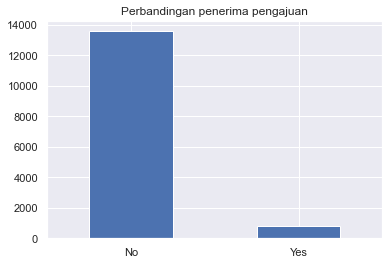

In [38]:
y_train.value_counts().plot(kind='bar')
plt.xticks([0,1],['No','Yes'], rotation=0)
plt.title('Perbandingan penerima pengajuan')

In [39]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(sampling_strategy = 1)
X_smote, y_smote = smote.fit_resample(X_train,y_train)

Text(0.5, 1.0, 'Perbandingan penerima pengajuan')

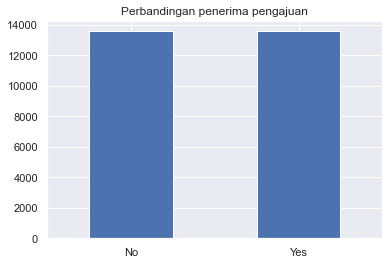

In [40]:
y_smote.value_counts().plot(kind='bar')
plt.xticks([0,1],['No','Yes'], rotation=0)
plt.title('Perbandingan penerima pengajuan')

## Modelling dan Prediksi

Decision Tree

In [41]:
tree = DecisionTreeClassifier(criterion='entropy',random_state=21)
tree.fit(X_train, y_train)
y_pred_dct = tree.predict(X_test)

print('Decision Tree Accuracy : ', accuracy_score(y_test,y_pred_dct))
print(confusion_matrix(y_test,y_pred_dct))
print('precision', precision_score(y_test,y_pred_dct))
print('recall', recall_score(y_test,y_pred_dct))
print('f1_score', f1_score(y_test,y_pred_dct))

Decision Tree Accuracy :  0.8952777777777777
[[3203  186]
 [ 191   20]]
precision 0.0970873786407767
recall 0.0947867298578199
f1_score 0.09592326139088729


In [42]:
tree1 = DecisionTreeClassifier(criterion='entropy',random_state=21)
tree1.fit(X_smote, y_smote)
y_pred_dct1 = tree1.predict(X_test)

print('Decision Tree Accuracy: ', accuracy_score(y_test,y_pred_dct1))
print(confusion_matrix(y_test,y_pred_dct1))
print('precision', precision_score(y_test,y_pred_dct1))
print('recall', recall_score(y_test,y_pred_dct1))
print('f1_score', f1_score(y_test,y_pred_dct1))

Decision Tree Accuracy:  0.8888888888888888
[[3180  209]
 [ 191   20]]
precision 0.08733624454148471
recall 0.0947867298578199
f1_score 0.0909090909090909


In [49]:
y_pred_dct1 = tree1.predict(X_test)
print('Nasabah Yang Terapprove Pengajuannya',y_pred_dct1.sum())

Nasabah Yang Terapprove Pengajuannya 229


Text(0, 0.5, 'Frequency')

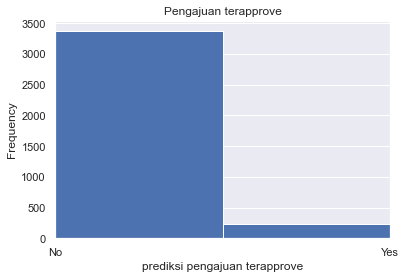

In [44]:
plt.hist(y_pred_dct1, bins=2)
plt.xlim("No","Yes")
plt.title('Pengajuan terapprove')
plt.xlabel('prediksi pengajuan terapprove')
plt.ylabel('Frequency')

In [45]:
y_pred_dct1.mean()

0.0636111111111111

Random Forest

In [52]:
rfc = RandomForestClassifier(random_state=21)
rfc.fit(X_train, y_train)
y_pred_rfc = rfc.predict(X_test)

print('Decision Tree Accuracy: ', accuracy_score(y_test,y_pred_rfc))
print(confusion_matrix(y_test,y_pred_rfc))
print('precision', precision_score(y_test,y_pred_rfc))
print('recall', recall_score(y_test,y_pred_rfc))
print('f1_score', f1_score(y_test,y_pred_rfc))

Decision Tree Accuracy:  0.9411111111111111
[[3388    1]
 [ 211    0]]
precision 0.0
recall 0.0
f1_score 0.0


In [53]:
rfc1 = RandomForestClassifier(random_state=21)
rfc1.fit(X_smote, y_smote)
y_pred_rfc1 = rfc1.predict(X_test)

print('Decision Tree Accuracy: ', accuracy_score(y_test,y_pred_rfc1))
print(confusion_matrix(y_test,y_pred_rfc1))
print('precision', precision_score(y_test,y_pred_rfc1))
print('recall', recall_score(y_test,y_pred_rfc1))
print('f1_score', f1_score(y_test,y_pred_rfc1))

Decision Tree Accuracy:  0.94
[[3384    5]
 [ 211    0]]
precision 0.0
recall 0.0
f1_score 0.0


In [54]:
y_pred_rfc1 = rfc1.predict(X_test)
print('Nasabah Yang Terapprove Pengajuannya',y_pred_rfc1.sum())

Nasabah Yang Terapprove Pengajuannya 5


In [55]:
y_pred_rfc1.mean()


0.001388888888888889

Text(0, 0.5, 'Frequency')

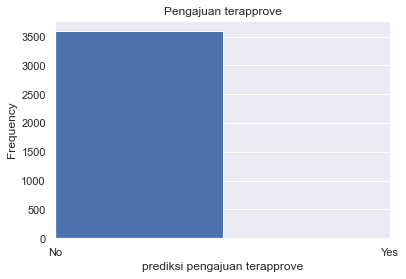

In [56]:
plt.hist(y_pred_rfc1, bins=2)
plt.xlim("No","Yes")
plt.title('Pengajuan terapprove')
plt.xlabel('prediksi pengajuan terapprove')
plt.ylabel('Frequency')

Xgboost

In [57]:
xgb = XGBClassifier(random_state=21)
xgb.fit(X_train, y_train)
y_pred_xgb = xgb.predict(X_test)

print('Decision Tree Accuracy: ', accuracy_score(y_test,y_pred_xgb))
print(confusion_matrix(y_test,y_pred_xgb))
print('precision', precision_score(y_test,y_pred_xgb))
print('recall', recall_score(y_test,y_pred_xgb))
print('f1_score', f1_score(y_test,y_pred_xgb))

Decision Tree Accuracy:  0.9394444444444444
[[3382    7]
 [ 211    0]]
precision 0.0
recall 0.0
f1_score 0.0


In [58]:
xgb1 = XGBClassifier(random_state=21)
xgb1.fit(X_smote, y_smote)
y_pred_xgb1 = xgb1.predict(X_test)

print('Decision Tree Accuracy: ', accuracy_score(y_test,y_pred_xgb1))
print(confusion_matrix(y_test,y_pred_xgb1))
print('precision', precision_score(y_test,y_pred_xgb1))
print('recall', recall_score(y_test,y_pred_xgb1))
print('f1_score', f1_score(y_test,y_pred_xgb1))

Decision Tree Accuracy:  0.9391666666666667
[[3380    9]
 [ 210    1]]
precision 0.1
recall 0.004739336492890996
f1_score 0.00904977375565611


Text(0, 0.5, 'Frequency')

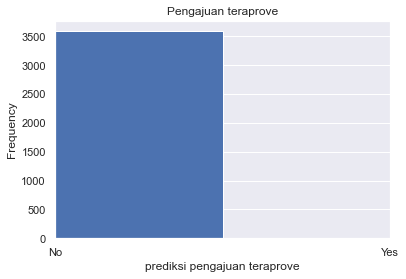

In [59]:
plt.hist(y_pred_xgb1, bins=2)
plt.xlim("No","Yes")
plt.title('Pengajuan teraprove')
plt.xlabel('prediksi pengajuan teraprove')
plt.ylabel('Frequency')

In [60]:
y_pred_xgb1 = xgb1.predict(X_test)
print('Nasabah Yang Terapprove Pengajuannya',y_pred_xgb1.sum())

Nasabah Yang Terapprove Pengajuannya 10


In [61]:
y_pred_xgb1.mean()

0.002777777777777778